In [1]:
pip install pandas matplotlib yfinance pmdarima

  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7231 sha256=f8afbcc00470ea8020494503b3e3bc2dfea9478f48ffda6dd1298501e1156e61
  Stored in directory: c:\users\achin\appdata\local\pip\cache\wheels\8b\65\34\00416d116b8e8010472d9c8bf40b3cef1d07b2af8820d732f7
Successfully built yahoo-finance
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed
Date
2010-01-04    7.643214
2010-01-05    7.656429
2010-01-06    7.534643
2010-01-07    7.520714
2010-01-08    7.570714
Freq: D, Name: Close, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15386.561, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15371.501, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15370.684, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15388.186, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15370.755, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15370.545, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15372.714, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15372.418, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15374.545, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15372.854, Time=0.18 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time

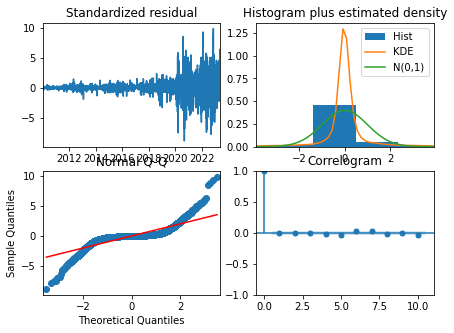

2023-04-10           NaN
2023-04-11           NaN
2023-04-12           NaN
2023-04-13           NaN
2023-04-14           NaN
2023-04-17           NaN
2023-04-18           NaN
2023-04-19           NaN
2023-04-20           NaN
2023-04-21           NaN
2023-04-24           NaN
2023-04-25           NaN
2023-04-26           NaN
2023-04-27           NaN
2023-04-28           NaN
2023-05-01           NaN
2023-05-02           NaN
2023-05-03           NaN
2023-05-04           NaN
2023-05-05           NaN
2023-05-08           NaN
2023-05-09           NaN
2023-05-10           NaN
2023-05-11           NaN
2023-05-12           NaN
2023-05-15           NaN
2023-05-16           NaN
2023-05-17           NaN
2023-05-18           NaN
2023-05-19           NaN
2023-05-22           NaN
2023-05-23           NaN
2023-05-24           NaN
2023-05-25           NaN
2023-05-26           NaN
2023-05-29    175.294443
2023-05-30    175.328704
2023-05-31    175.362965
2023-06-01    175.397227
2023-06-02    175.431488


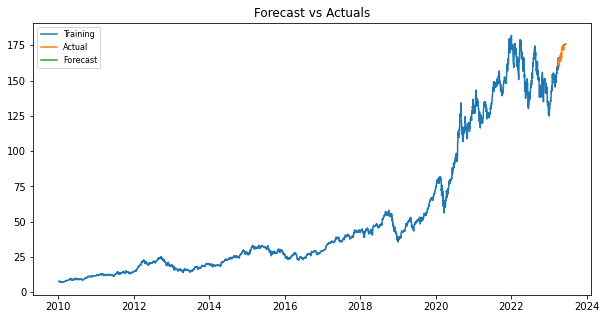

In [8]:
# Step 1: Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima

# Step 2: Fetch Data from Yahoo Finance

# Fetch data
data = yf.download('AAPL','2010-01-01','2023-05-30')

# We will use 'Close' prices for our analysis
df = data['Close']

# Step 3: Preprocess the Data

# Check for NaN values and remove them
if df.isnull().sum() > 0:
    df = df.dropna()

# Check for duplicate indices and remove them
df = df.loc[~df.index.duplicated(keep='first')]

# Resample data to have one data point for each day
df = df.resample('D').ffill()

# Display first 5 rows
print(df.head())

# Step 3: Split the Data into Train and Test Sets

train_size = int(len(df) * 0.99)  # Use 99% of the data for training
train, test = df[:train_size], df[train_size:]

# Step 4: Fit an ARIMA Model on the Training Set

# Use auto_arima to determine the best parameters
model = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, trace=True)

# Fit the model
model.fit(df)

# Plot diagnostics
model.plot_diagnostics(figsize=(7,5))
plt.show()

# Step 5: Forecast Prices (on the Test Set)

# Forecast the next steps equal to the size of the test set
forecast = model.predict(n_periods=len(test))

# Generate date index
date_index = pd.date_range(start=test.index[0], periods=len(test), freq='B') # 'B' is for business days

# Attach date index to forecast
forecast = pd.Series(forecast, index=date_index)

# Print forecast
print(forecast)

# Step 6: Compare Forecast to Actuals

plt.figure(figsize=(10, 5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
